# Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
%matplotlib inline

In [2]:
datadir = "../datasets/raw"

# Data Visualization by Matplotlib

In [3]:
seattle_weather = pd.read_csv(os.path.join(datadir,"seattle_weather.csv"))
austin_weather  = pd.read_csv(os.path.join(datadir,"austin_weather.csv"))

In [4]:
seattle_weather.rename(columns={'DATE':'MONTH'}, inplace=True)
austin_weather.rename(columns={'DATE':'MONTH'}, inplace=True)

In [5]:
seattle_weather.head()

,STATION,NAME,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,...,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1
2,USC00456295,"PALMER 3 ESE, WA US",3,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,...,310.0,310.0,35.9,5.0,47.0,111.0,393.0,848.0,1000.0,2.1
3,USC00456295,"PALMER 3 ESE, WA US",4,108.0,40.0,12.0,7.0,3.0,-7777.0,0.0,...,300.0,300.0,38.3,0.0,0.0,5.0,123.0,571.0,978.0,2.0
4,USC00456295,"PALMER 3 ESE, WA US",5,255.0,130.0,56.0,38.0,19.0,1.0,-7777.0,...,310.0,310.0,43.5,0.0,0.0,0.0,0.0,83.0,610.0,2.0


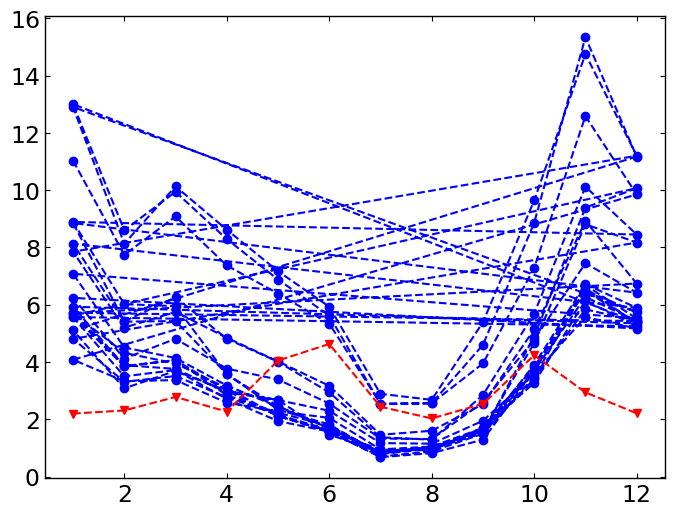

In [6]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

### draw multiple plots

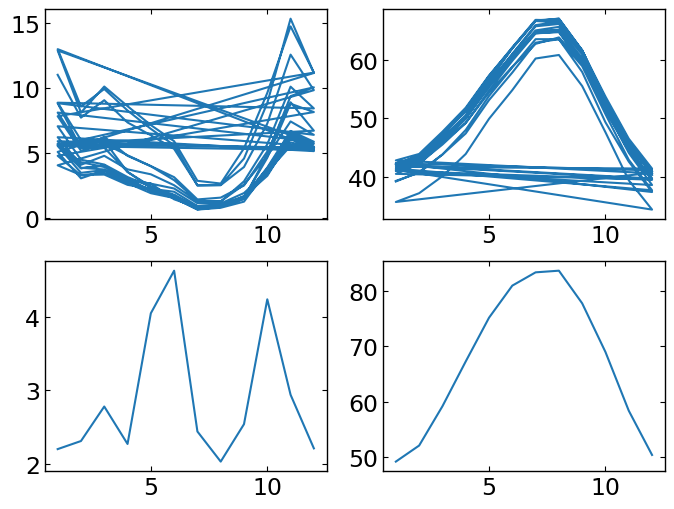

In [7]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

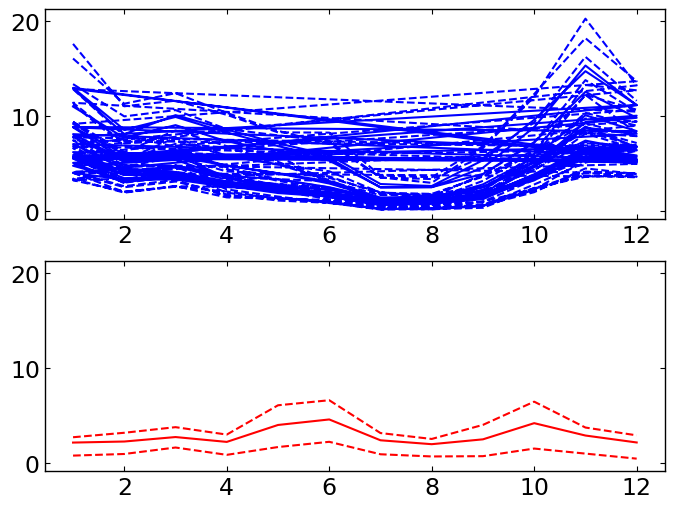

In [8]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

## Plotting time-series

### draw time-series plot w/ pandas

In [9]:
# Read the data from file using read_csv
climate_change = pd.read_csv(os.path.join(datadir,'climate_change.csv'), \
                             parse_dates=['date'], index_col=['date'])  # date information into datetimes & configure it to index

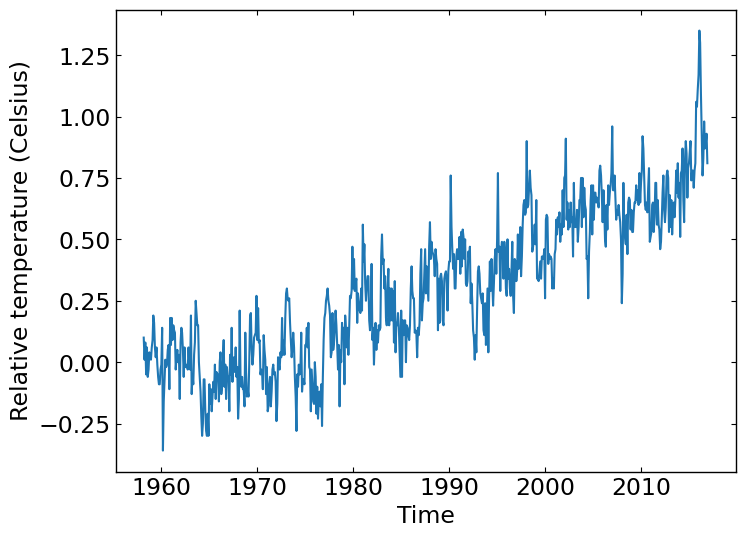

In [10]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change.relative_temp)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)');

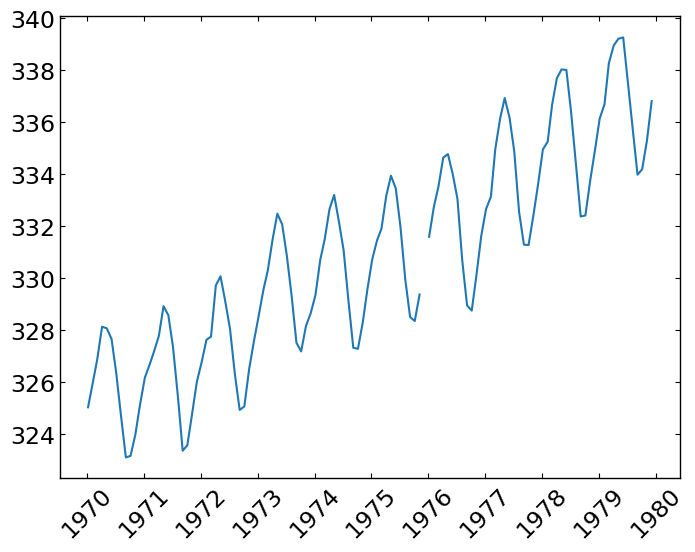

In [11]:
''' Zooming the time series '''
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

plt.xticks(rotation=45);

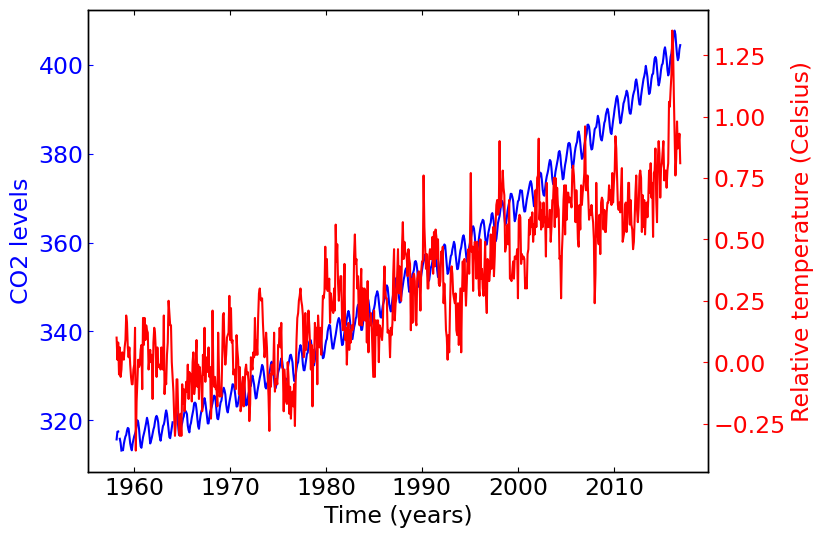

In [12]:
''' plotting two variables '''

# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
    
    
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], "red", "Time (years)", "Relative temperature (Celsius)")

### annotate

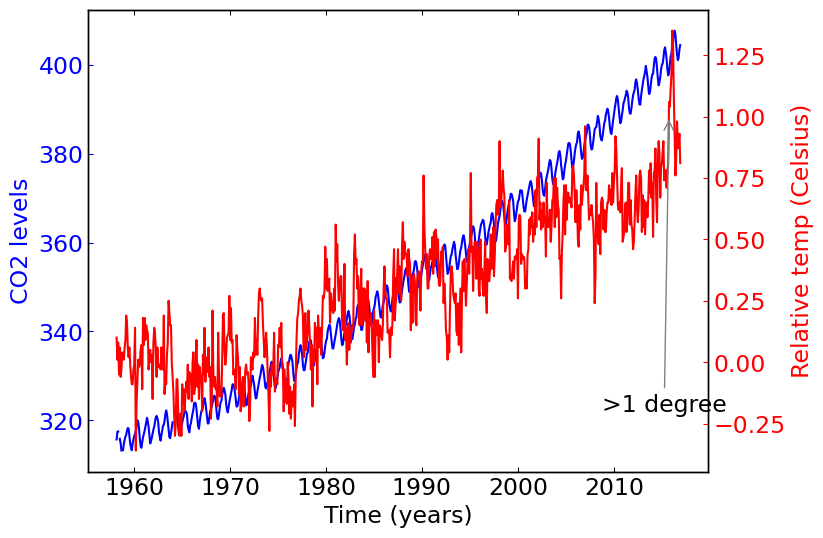

In [13]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', \
                'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', \
                'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), \
             arrowprops={"arrowstyle":"->", "color":"gray"});

## Quantitative comparisons and statistcal visualizations

### bar chart

In [14]:
medals = pd.read_csv(os.path.join(datadir,"medals_by_country_2016.csv"), index_col=0)

In [15]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


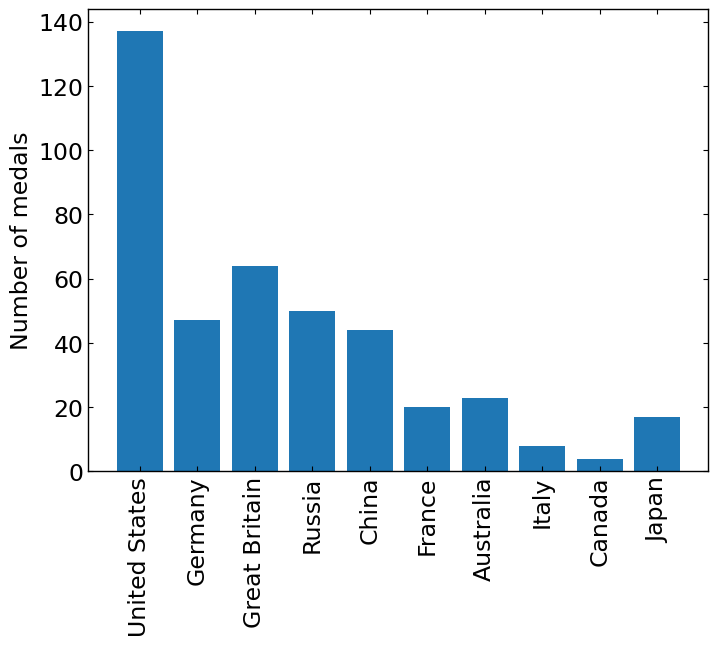

In [16]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(medals.index, rotation=90)
ax.set_xticks(ax.get_xticks())
ax.xaxis.set_ticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals");

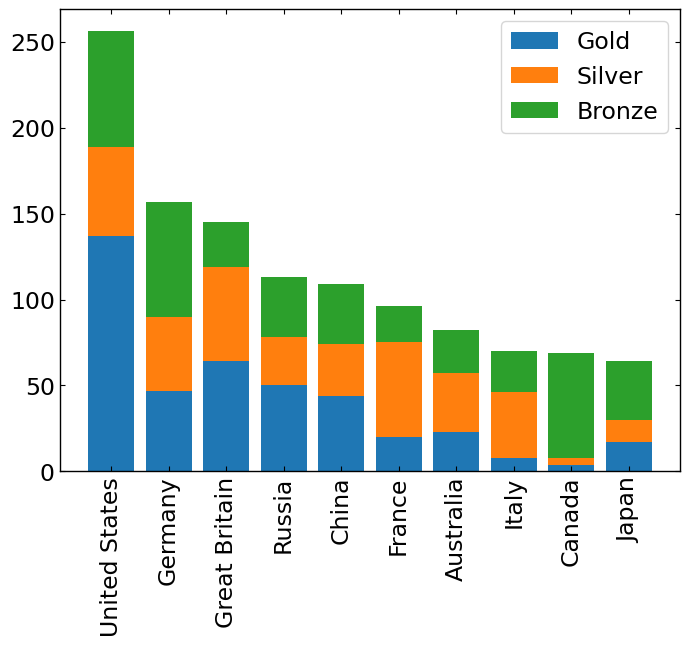

In [17]:
''' Stacked bar chart '''

fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

# Display the legend
ax.legend()

ax.set_xticks(ax.get_xticks())
ax.xaxis.set_ticklabels(medals.index, rotation=90);

### Histogram

In [18]:
sports16 = pd.read_csv(os.path.join(datadir,"summer2016.csv"), index_col=0)

In [19]:
sports16.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [20]:
mens_rowing = sports16[(sports16["Sport"]=="Rowing") & (sports16["Sex"]=="M")]
mens_gymnastics = sports16[(sports16["Sport"]=="Gymnastics") & (sports16["Sex"]=="M")]

In [21]:
mens_rowing.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


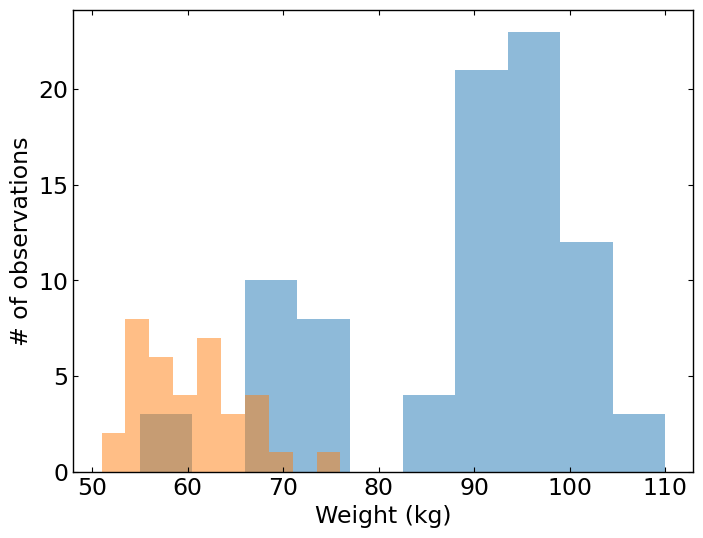

In [22]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], alpha=0.5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], alpha=0.5)

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations");

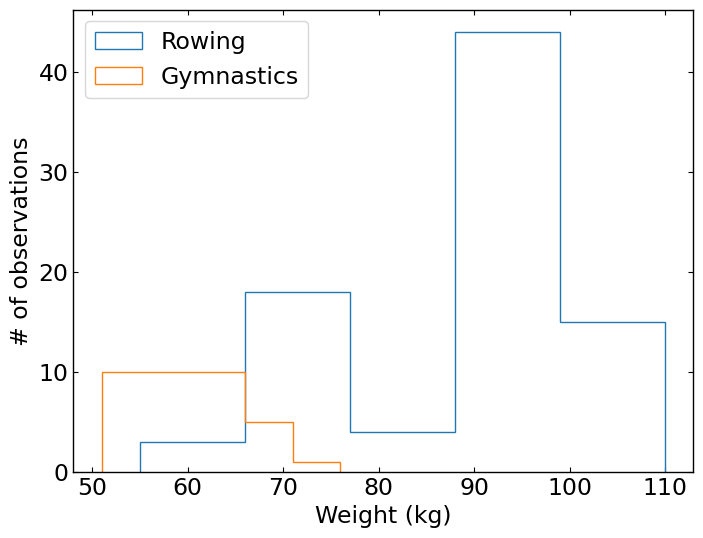

In [23]:
''' Step histogram '''
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label="Rowing", histtype="step",bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label="Gymnastics", histtype='step',bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend(loc='upper left');

### Error bars

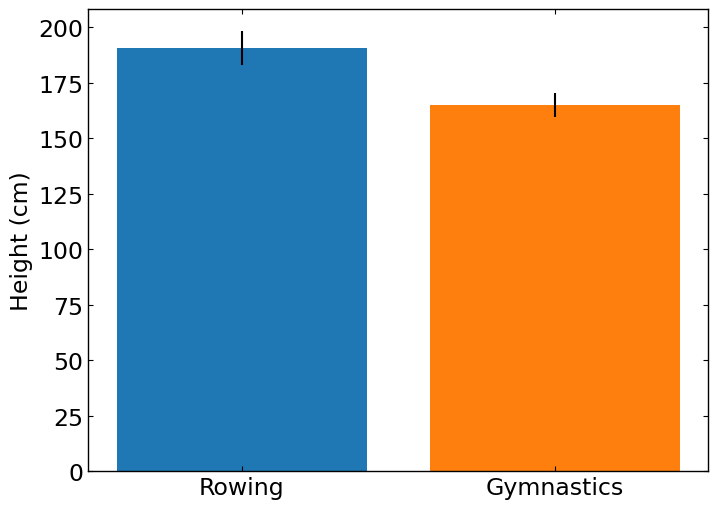

In [24]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel('Height (cm)');

Text(0, 0.5, 'Temperature (Fahrenheit)')

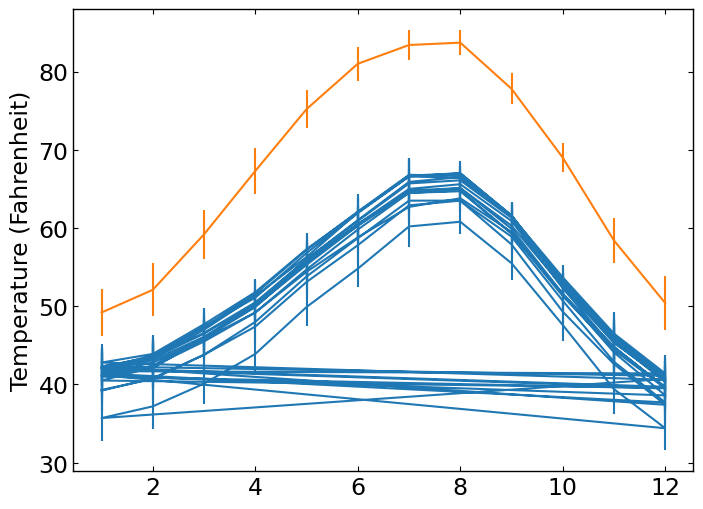

In [25]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], \
    yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], \
    yerr=austin_weather["MLY-TAVG-STDDEV"]) 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

### boxplots

Text(0, 0.5, 'Height (cm)')

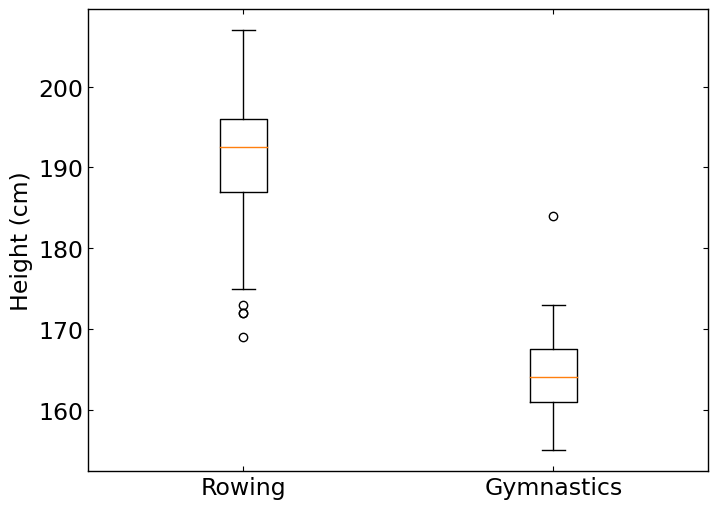

In [26]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

> Central line: Median
> box size: 25th / 75th interquartile (IQR) range
> error bar: 1.5 * IQR

### Scatter plot

Text(0, 0.5, 'Relative temperature (C)')

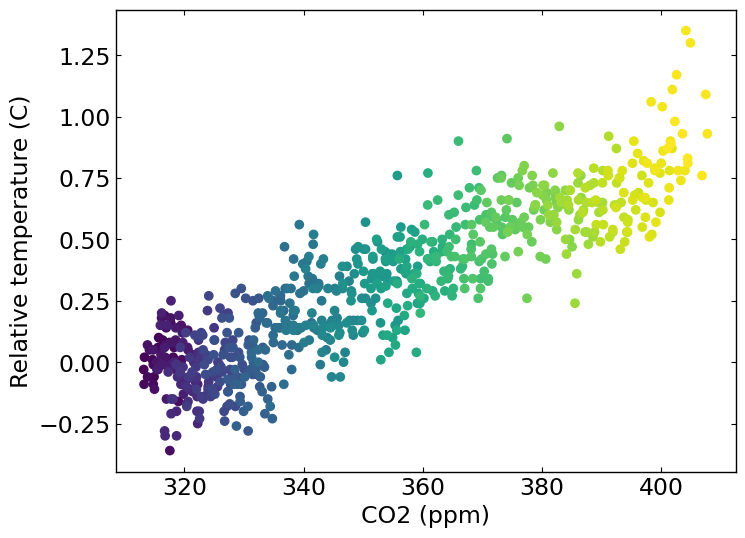

In [27]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], \
    c=climate_change.index)  # color

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

# Data Visualization by Seaborn

In [28]:
df = pd.read_csv(os.path.join(datadir,'young-people-survey-responses.csv'))

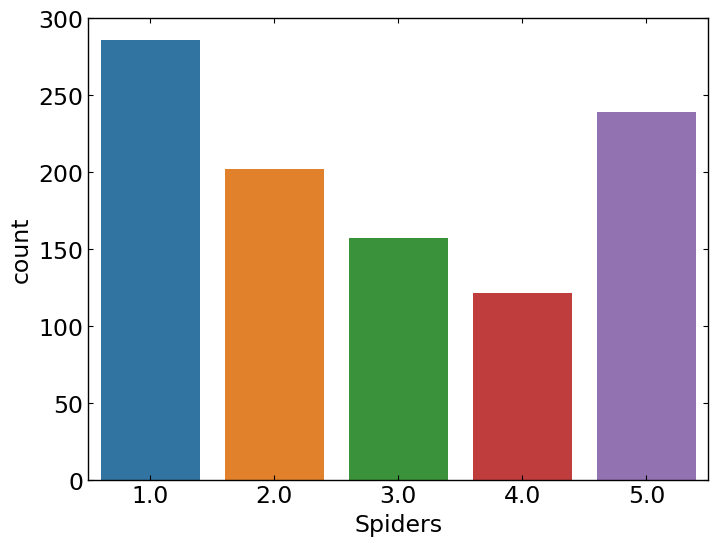

In [29]:
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x="Spiders",data=df);

### plots and Hue
- using as sub-groups

In [30]:
student_data = pd.read_csv(os.path.join(datadir,'student-alcohol-consumption.csv'))

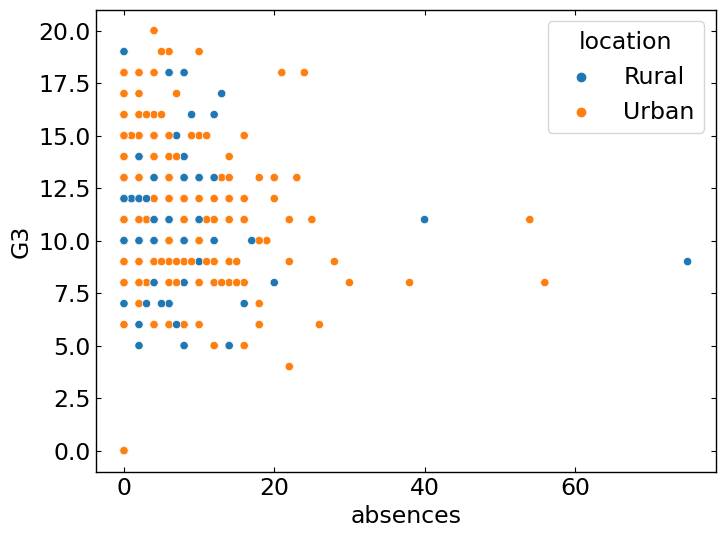

In [31]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location",
                hue_order=["Rural", "Urban"]);  # order of group

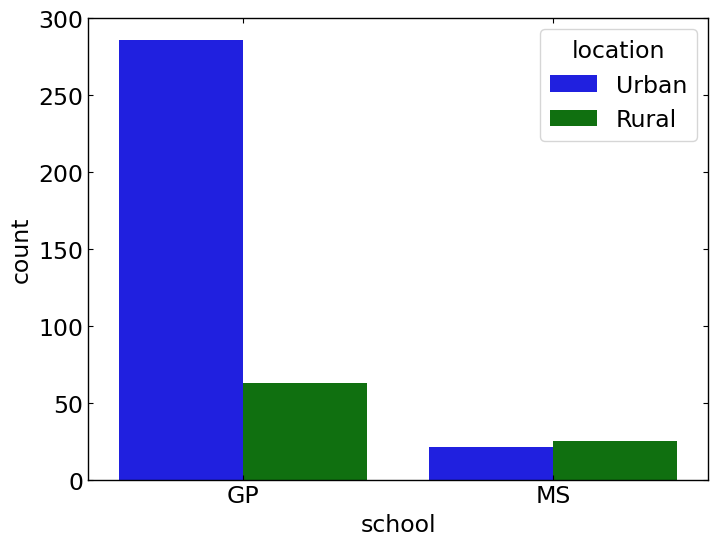

In [32]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school",data=student_data, \
                hue='location', palette=palette_colors);

## Visualizingn Two Quantitative Variables

### subplots with col and row

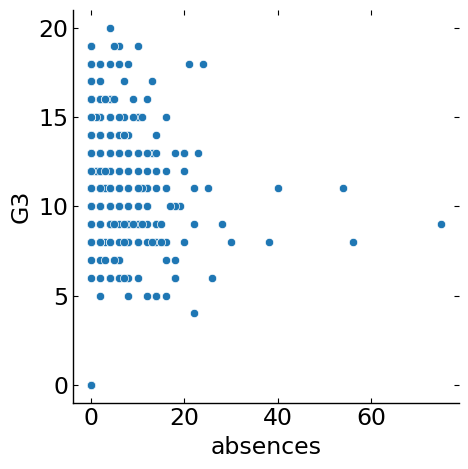

In [33]:
g = sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter")

<div class="alert alert-warning">
There is an error that has redundant ticks on right/top axis. The temporary resolution is as follows:
</div>

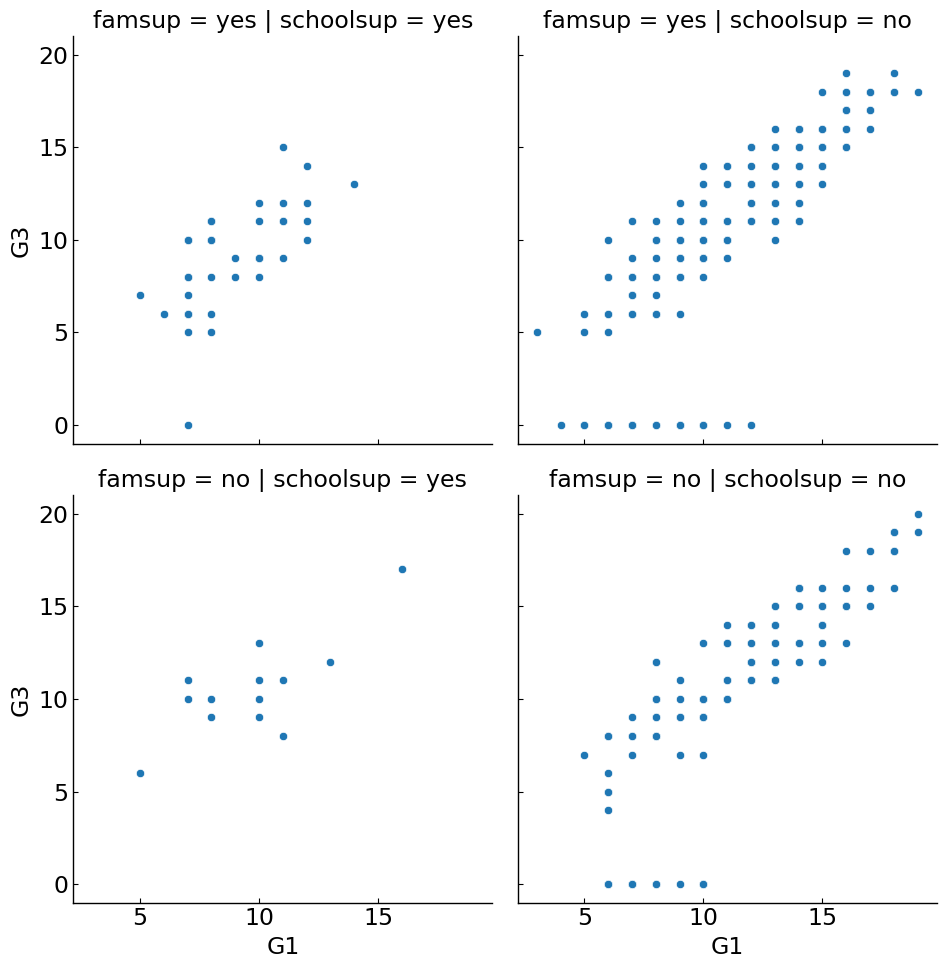

In [34]:
# Adjust further to add subplots based on family support
g = sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter",
            col="schoolsup",
            row="famsup",
            col_order=["yes", "no"],
            row_order=["yes", "no"])

# remove redundant ticks 
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

#g.tick_params(bottom=False)
#plt.tick_params(axis='y', right=False)    # remove redundant ticks
#plt.tick_params(axis='x', top=False)

### changing the size of scatter plot points

In [35]:
mpg = pd.read_csv(os.path.join(datadir,'mpg.csv'))

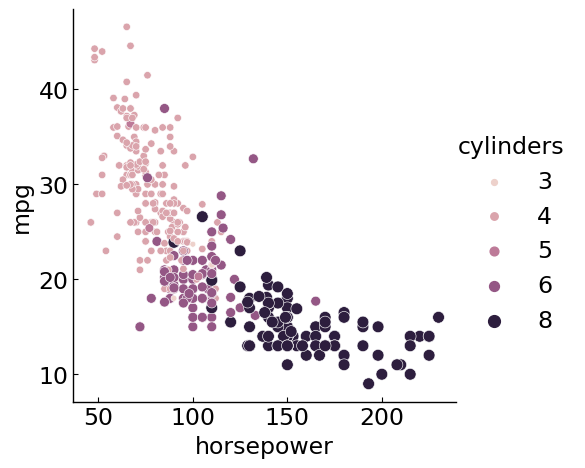

In [36]:
g = sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue="cylinders")

# remove redundant tick 
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)
    
#plt.tick_params(axis='y', right=False)    # remove redundant ticks
#plt.tick_params(axis='x', top=False)

### line plots

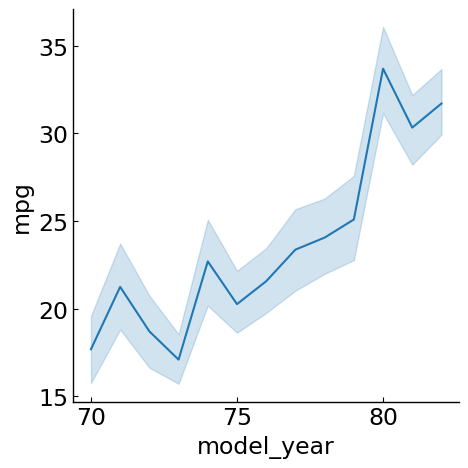

In [37]:
g = sns.relplot(x="model_year", y="mpg", data=mpg, kind="line")

# remove redundant tick 
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)
    
#plt.tick_params(axis='y', right=False)    # remove redundant ticks
#plt.tick_params(axis='x', top=False)

> The shaded region indicates the 95% confidence interval. 
> The interval can be changed by ci=None or "sd" (see below)

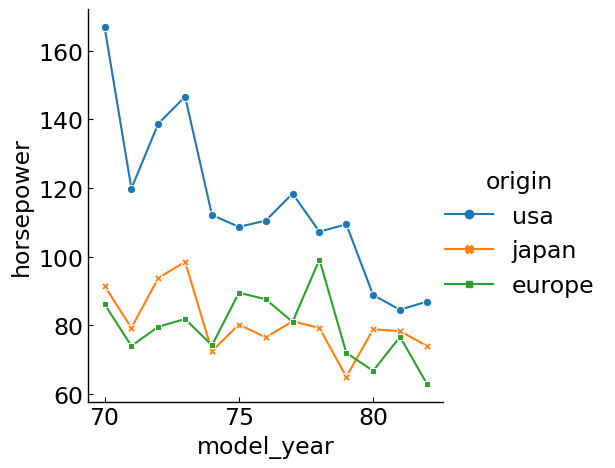

In [38]:
g = sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", dashes=False, markers=True)


# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)
    
#plt.tick_params(axis='y', right=False)    # remove redundant ticks
#plt.tick_params(axis='x', top=False)

## Visualizing a Categorical and a Quantatitative Variables

### Count plots

In [39]:
survey_data = pd.read_csv(os.path.join(datadir,'young-people-survey-responses.csv'), index_col=0)

In [40]:
# create new boolean column to show the interested in math, depending on the score in Math column
survey_data["Interested in Math"] = survey_data["Mathematics"] >= 4

# create new categorical column to separate the age group
less21 = survey_data["Age"] < 21
survey_data["Age Category"] = pd.Categorical(np.where(less21, 'Less than 21', '21+'))

In [41]:
survey_data.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Interested in Math,Age Category
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,False,Less than 21
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,True,Less than 21
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,True,Less than 21
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,True,21+
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,False,Less than 21


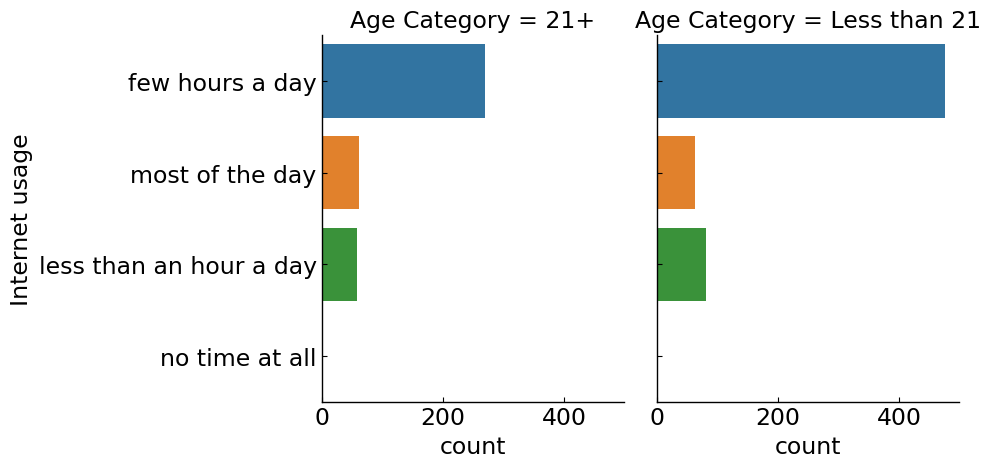

In [42]:
g = sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col="Age Category")

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

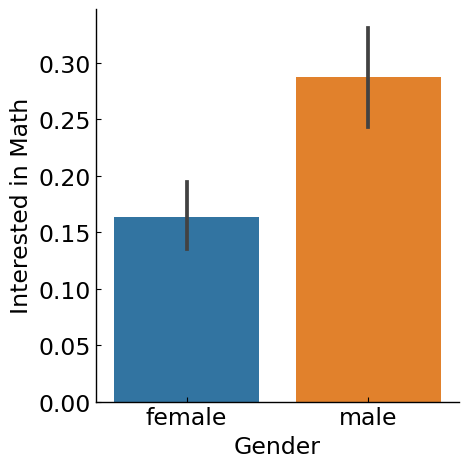

In [43]:
g = sns.catplot(x="Gender", y="Interested in Math", data=survey_data, kind="bar")

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

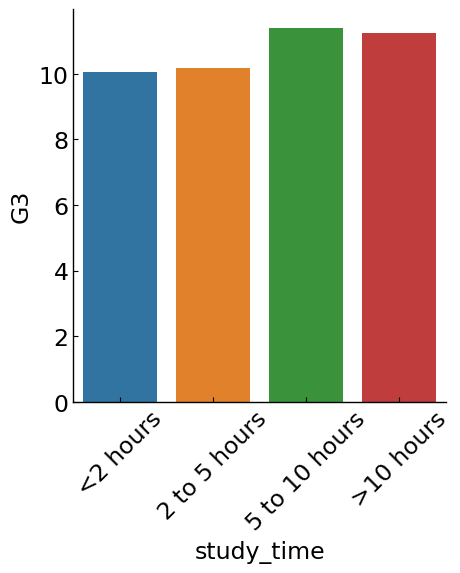

In [44]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
g = sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

### Box plots

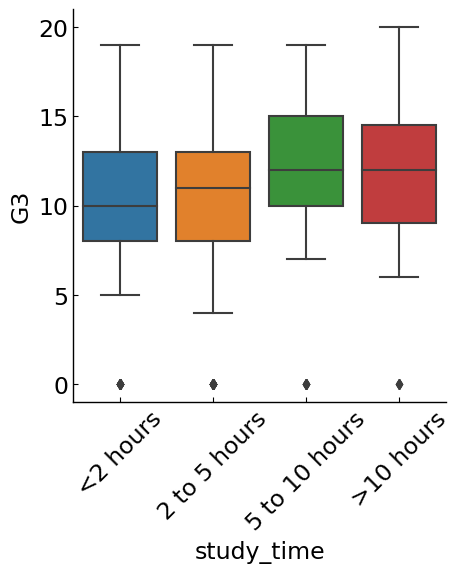

In [45]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
g = sns.catplot(x="study_time", y="G3", data=student_data, kind="box", order=study_time_order)

g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

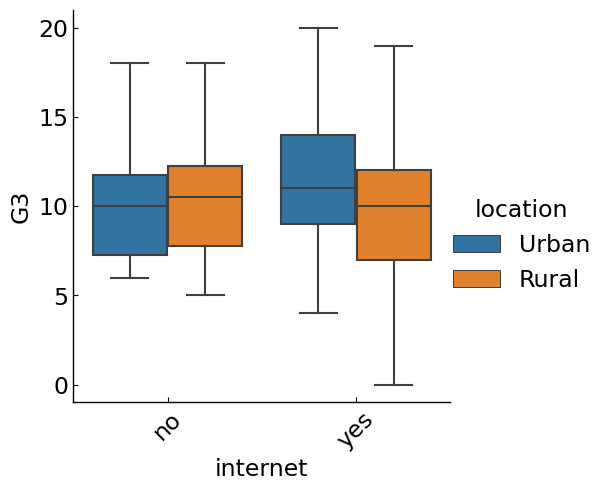

In [46]:
''' empty symbols '''

g = sns.catplot(x="internet", y="G3", kind="box", data=student_data, hue="location", sym="")

g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

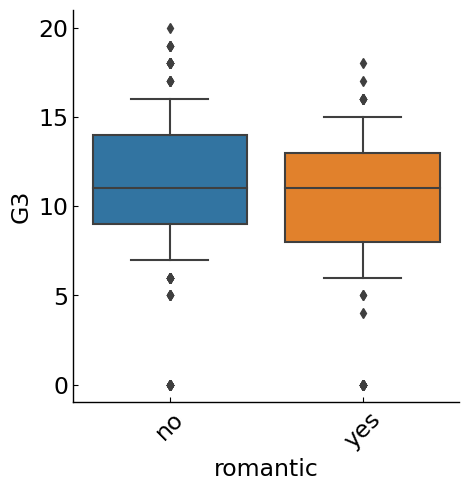

In [47]:
''' adjusting whiksers '''

# Set the whiskers to 0.5 * IQR
g = sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=0.5)

g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

> whis = 0.5   # 0.5 * IQR </br>
> whis = [5,95]  # range between 5th and 95th quantile </br>
> whis = [0,100] # min / max of data

### Point plots

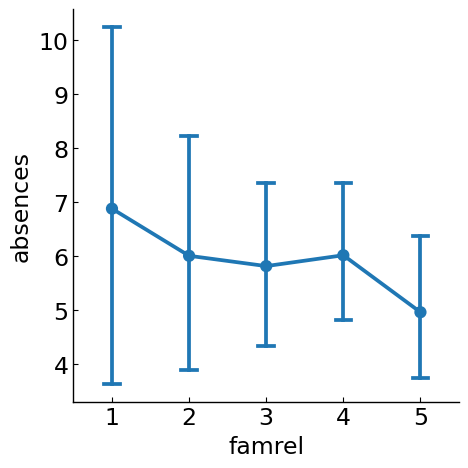

In [48]:
# Add caps to the confidence interval
g = sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point", capsize=0.2)

#g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

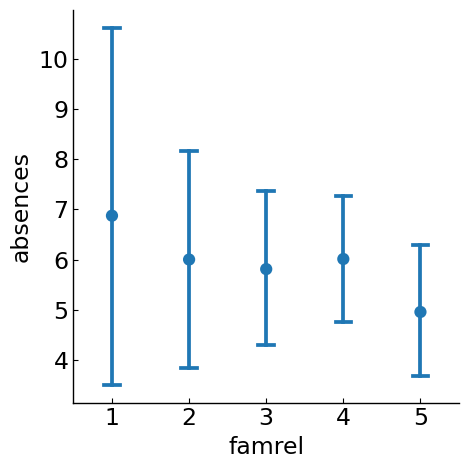

In [49]:
''' remove connecting lines in point plots '''

# Add caps to the confidence interval
g = sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point", capsize=0.2, join=False)

#g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

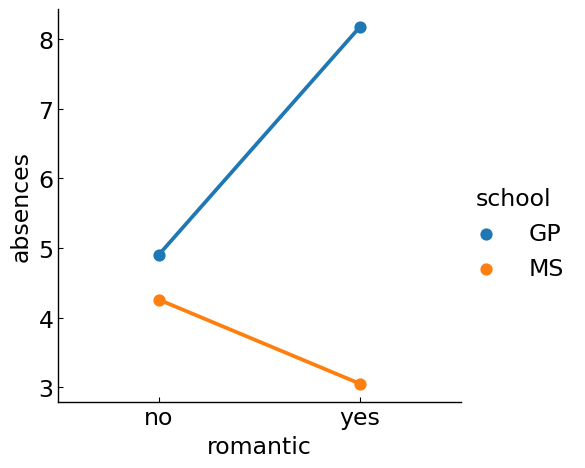

In [50]:
''' point plots w/ subgroups '''

# Create a point plot that uses color to create subgroups
g = sns.catplot(x="romantic", y="absences", data=student_data, kind="point", \
            hue="school", \
            ci=None)   # No confidence interval

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

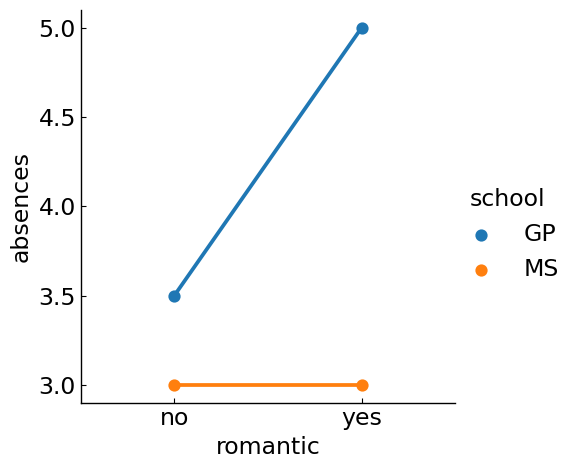

In [51]:
''' point plots w/ median value not mean '''

# Create a point plot that uses color to create subgroups
g = sns.catplot(x="romantic", y="absences", data=student_data, kind="point", \
            hue="school", \
            ci=None, estimator=np.median)   # No confidence interval

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

## Customizing

### Changing style and palette

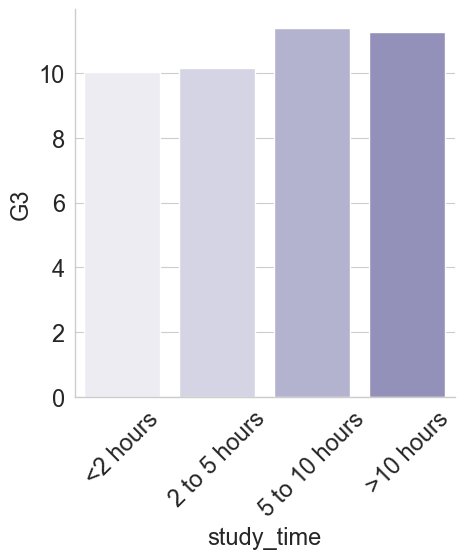

In [52]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
g = sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

g.set_xticklabels(rotation=45)   # rotate the tick labels

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

### Change the scale 

- .set_context("") : paper, notebook, talk, poster

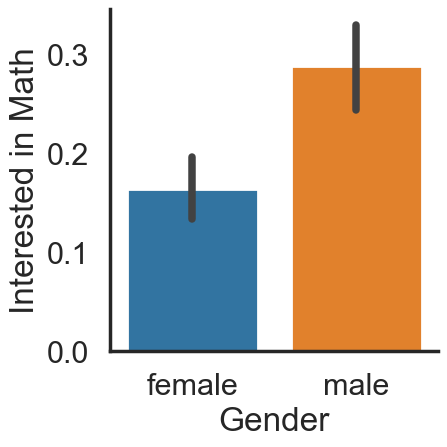

In [62]:
sns.set_style("white")
sns.set_palette("tab10")

# Change the context to "poster"
sns.set_context("poster")

g = sns.catplot(x="Gender", y="Interested in Math", data=survey_data, kind="bar")

# remove redundant ticks
for axis in g.axes.flat:
    axis.tick_params(right=False, top=False)

### FacetGrids vs. AxesSubplots

<class 'seaborn.axisgrid.FacetGrid'>


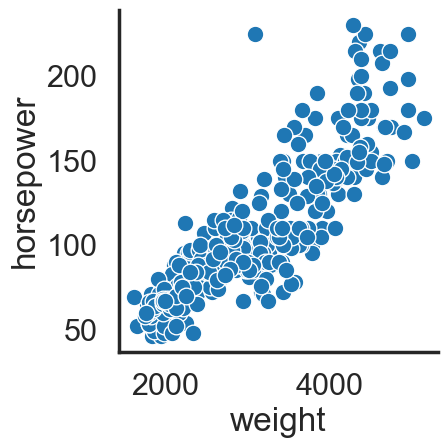

In [63]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
print(type(g))

### Add title

Text(0.5, 0.98, 'Car Weight vs. Horsepower')

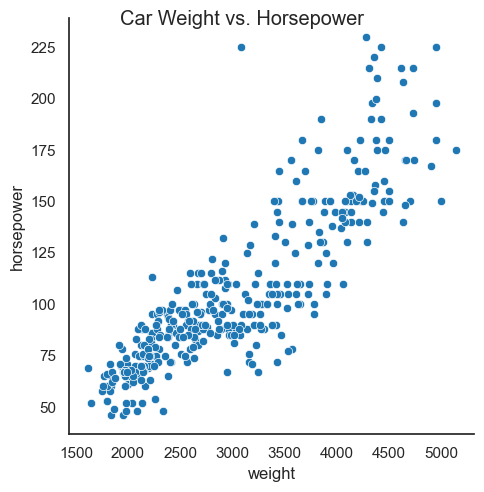

In [64]:
sns.set_style("white")
sns.set_context("notebook")

# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

In [65]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [66]:
''' group by model year'''

mpg_mean = mpg.groupby(by = ['model_year', 'origin']).agg({'mpg': 'mean'})
mpg_mean.rename(columns={'mpg':'mpg_mean'}, inplace=True)  # change column name

In [67]:
mpg_mean.head()

mpg_mean
model_year origin           
70         europe  25.200000
           japan   25.500000
           usa     15.272727
71         europe  28.750000
           japan   29.500000

[Text(0.5, 0, 'Car Model Year'), Text(0, 0.5, 'Average MPG')]

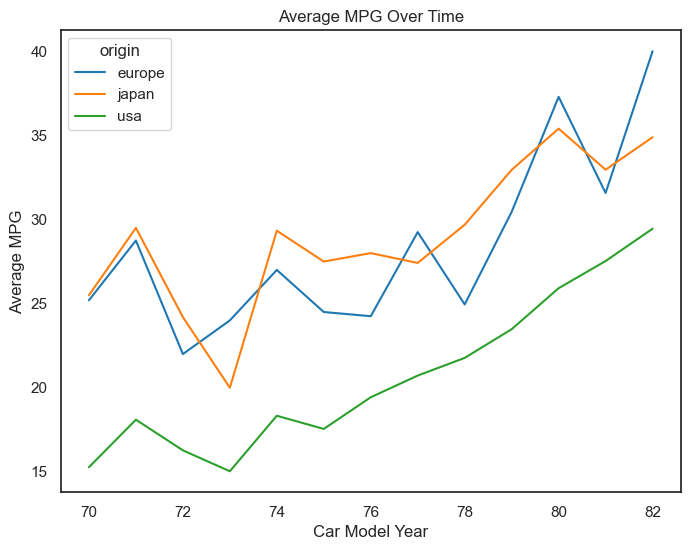

In [68]:
''' add labels for FacetGrid '''

# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", \
    ylabel="Average MPG")